In [1]:
import numpy as np
from math import exp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
train_data = np.loadtxt('ml_hw1\data2Tr.txt')
Xtest = np.loadtxt('ml_hw1\data2Ts.txt')   # [ 1.      ,  0.834589,  0.256806]   is the first row

        Organize our data and keep a copy of X (X_old) for plotting purposes. X(input) is the first two column of train_data, t(output) is the third column of train_data. 

In [2]:
X = train_data[:,0:2]
t = train_data[:,2]
#Keep a reference of X and Xtest before adding the ones for easy plotting purposes
Xtest_old = np.loadtxt('ml_hw1\data2Ts.txt')   # [ 0.834589,  0.256806] is the first row
X_old = train_data[:,0:2]   # [ 0.512909,  0.940407] is the first row

In [3]:
N, D = X.shape

In [4]:
Ntest=Xtest.shape[0]

Add 1 as the first for both the training input and test inputs

In [5]:
X = np.c_[np.ones(len(X)),X]
Xtest = np.c_[np.ones(len(Xtest)),Xtest]

Initial w for the gradient ascent, lambda variable, and options list 

In [6]:
winit = np.zeros(D+1)
l = 0.0 
options = [500,exp(1e-6),8/N]
print(winit)

[ 0.  0.  0.]


Definition of required functions 

In [30]:
def sigmoid(z):
    yx = 1.0/(1+np.exp(-z))
    return yx

def ml_logregTrain(t,X,l,winit,options):
    w = winit
    itera = options[0]
    tol = options[1]
    eta = options[2]
    ewold = np.float('-Inf')
    for it in range(1,itera):
        yx = np.dot(X,w)
        s = sigmoid(yx)
        #ew = sum(np.multiply(t,np.log(s)) + np.multiply(1-t,np.log(1-s))) - 0.5*np.dot(w.transpose(),w)
        ew = sum(np.multiply(t,np.log(s)) + np.multiply((1-t),np.log(1-s))) - np.dot((0.5 * l), np.dot(w.transpose(),w))  
        print('Iteration: {}, Cost function: {}\n'.format(it,ew))
        if np.absolute(np.subtract(ew,ewold)) < np.float(tol):
            break
        gradient = np.dot(X.transpose(),(t-s)) - np.multiply(l,w)
        #print('gradient is {}'.format(gradient))
        w += np.multiply(np.float(eta),gradient)
        #print("\nw now is {}\n".format(w))
        ewold=ew
    return w 

def ml_logregTest(w, Xtest):
    ytest=sigmoid(np.dot(Xtest,w))
    ttest  = np.round(ytest)
    return ttest, ytest 

w = ml_logregTrain(t, X, l, winit, options)
ttest,ytest = ml_logregTest(w,Xtest)

Iteration: 1, Cost function: -10.665837235147063

Iteration: 2, Cost function: -10.520898824545558



In [13]:
maxX=X[:,1].max()
minX=X[:,1].min()

Below are the plots. To plot X data if t =1 or if t=0, I decided to zip t and X_old and use an if.     Sample row of zipped array is "(1.0, array([ 1.      ,  0.460484,  0.415557]))" Where 1.0 is t, and array that follows is with the 1's added and X datapoint coordinates.  So now to plot, I have from the above ask to return :  
[ i [ 1 ][ 1 ] for i in zip(t,X) if i[ ::2 ][ 0 ] == 0.]   for X1,1     and t=0.  
[ i [ 1 ][ 2 ] for i in zip(t,X) if i[ ::2 ][ 0 ] == 1.]   for X1,2     and t=1.

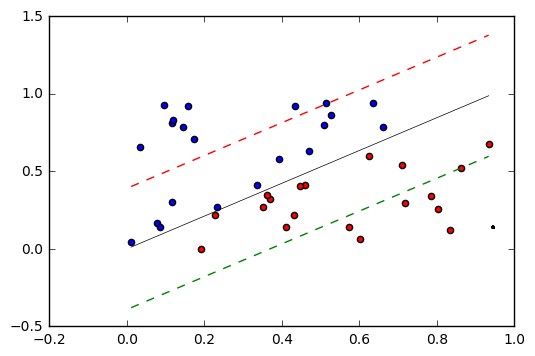

In [31]:
#plt.scatter(X[:,1:3],c='red')
plt.scatter([i[1][0] for i in zip(t,X_old) if i[::2][0] == 0.],[i[1][1] for i in zip(t,X_old) if i[::2][0] == 0.])
plt.scatter([i[1][0] for i in zip(t,X_old) if i[::2][0] == 1.],[i[1][1] for i in zip(t,X_old) if i[::2][0] == 1.] ,c='red')

plt.plot([minX,maxX],-np.float(w[0]/w[2]) - np.dot((w[1]/w[2]),[minX,maxX]),lw='0.5',c='black')
#p=0.1 and p=0.9 decision boundaries
plt.plot([minX,maxX],-np.float(np.log(0.9/0.1)/w[2]) -np.float(w[0]/w[2]) - np.multiply((w[1]/w[2]),[minX,maxX]),'--',lw='1',c='red')
plt.plot([minX,maxX],-np.float(np.log(0.1/0.9)/w[2]) -np.float(w[0]/w[2]) - np.multiply((w[1]/w[2]),[minX,maxX]),'--',lw='1',c='green')
#plot probabilities in the test data
for n in range(1,Ntest):
    plt.scatter(Xtest_old[1][0],Xtest_old[1][1],[1-ytest[n],ytest[n]])
    
#plt.scatter([i[1][1] for i in zip(t,X) if i[::2][0] == 0.],[i[1][2] for i in zip(t,X) if i[::2][0] == 0.])
#plt.scatter([i[1][1] for i in zip(t,X) if i[::2][0] == 1.] ,[i[1][2]-0.5 for i in zip(t,X) if i[::2][0] == 1.] ,c='red')
#plt.plot([minX,maxX],-np.float(w[0]/w[2]) - np.dot((w[1]/w[2]),[minX,maxX]),lw='2',c='black')
#plt.plot([minX,maxX],-np.float(np.log(0.9/0.1)/w[2]) - np.float(w[0]/w[2])-np.dot((w[1]/w[2]),[minX,maxX]),'--',lw='1')
#plt.plot([minX,maxX],-np.float(np.log(0.1/0.9)/w[2]) - np.float(w[0]/w[2])-np.dot((w[1]/w[2]),[minX,maxX]),'--',lw='1')

In [27]:
#[i[1][1:3] for i in zip(t,X) if i[::2][0] == 0.0]
#[i[1][1:3] for i in zip(t,X) if i[::2][0] == 1.0]
#[i[1][0] for i in zip(t,X_old) if i[::2][0] == 0.]
#[i[1][2]-0.5 for i in zip(t,X) if i[::2][0] == 1.]
ttest

array([ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1